# Logistic Regression Project - Tilapia Fish Health Dataset 
*By : Aaminah Arif - 100061200 and Sahlah Adesina - 100061415*

The **IoT Monitoring Dataset of Water Quality and Tilapia Health** provides six months (January–June 2024) of hourly water quality and fish health data from aquaculture ponds in Montería, Colombia. Key parameters include dissolved oxygen (DO), pH, temperature, turbidity, average fish weight, and survival rate. Fish health is classified as "At Risk" or "Stable" based on thermal and oxygen risk alerts.

Using this dataset, logistic regression will be applied to predict fish health status through the following steps:

1. Explaining the Model  
2. Describing the Data  
3. Arranging Data  
4. Train the model using Python, Gradient Descent and Newton Method.

In [1]:
#importing the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Task 1: Explain the Model

**Model Overview**

Our model is a logistic regression classifier designed to predict fish health status (Stable or At Risk) based on water quality and fish health parameters.  

**Number of Features**  

The model consists of 25 features, including:

1. Fish health indicators (e.g. weight, survival rate, disease occurrence)
2. Water quality metrics (e.g. temperature, dissolved oxygen, pH, turbidity)
3. Environmental factors (e.g. precipitation, time of day, seasonal trends)
4. Intervention measures (e.g. oxygenation and corrective actions)

The target variable **(Y)** is Fish Health Status, which is a binary outcome:
- 1 (Stable) – Fish are in good condition.
- 0 (At Risk) – Fish are experiencing thermal or oxygen stress.


**Mathematical Model**

Logistic regression models the probability of an event occurring using the sigmoid function: 


$$
P(Y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
$$

Where:  
- $P(Y = 1 | X)$  is the probability that the fish health status is "Stable."  
- $\beta_0$ is the intercept (bias term).  
- $\beta_1, \beta_2, ..., \beta_n $ are the model coefficients for each feature $ X_1, X_2, ..., X_n $.  
- The exponent $ e^{-(\beta_0 + \sum \beta_i X_i)} $ ensures a non-linear transformation that keeps the output between 0 and 1.  

To classify the fish health status, we use the decision rule:  
$$
\hat{Y} = 
\begin{cases} 
1, & \text{if } P(Y=1|X) \geq 0.5 \\
0, & \text{if } P(Y=1|X) < 0.5
\end{cases}
$$ 

**Objective:**  

By training the model using python function, gradient descent, and Newton Method we aim to optimize the parameters $\beta$ to minimize the error and improve the classification accuracy of fish health status.




## Task 2: Description of the Data

In the following section we gain a better understanding of the data.
We check the dataset for the following:
1. Null Values - No null values were present in the dataset
2. Correlation between dependent and independent variables
3. Distribution of features and target variable

In [2]:
# Reading the data as a dataframe
quality_df = pd.read_excel('Data_Model_IoTMLCQ_2024.xlsx')
quality_df.head()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,0.0,8.355273,0.387898,0.020505,Yes,No,Normal,Safe,Stable
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,1.0,8.256397,0.343950,0.108561,No,No,Normal,Safe,Stable
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,2.0,8.511549,0.365285,0.410457,Yes,No,Normal,Safe,Stable
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,3.0,8.362301,0.189601,0.891217,No,No,Normal,Safe,Stable
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,4.0,8.003350,0.318775,0.936614,Yes,No,Normal,Safe,Stable


In [3]:
# Checking if data has null values
quality_df.isnull()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


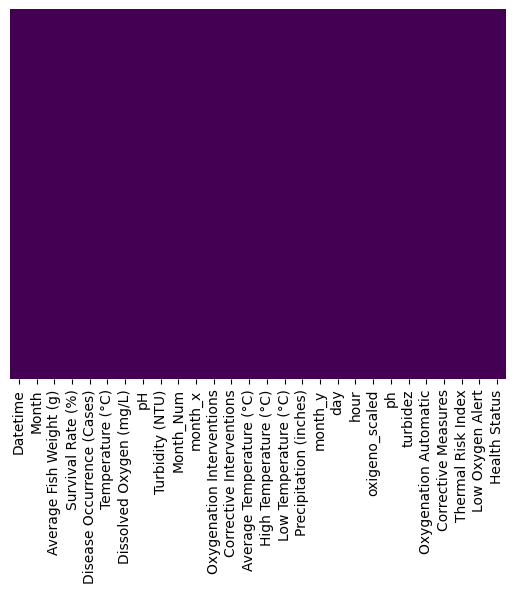

In [4]:
# Plotting the null values using a heatmap
sns.heatmap(quality_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [5]:
quality_df.columns

Index(['Datetime', 'Month', 'Average Fish Weight (g)', 'Survival Rate (%)',
       'Disease Occurrence (Cases)', 'Temperature (°C)',
       'Dissolved Oxygen (mg/L)', 'pH', 'Turbidity (NTU)', 'Month_Num',
       'month_x', 'Oxygenation Interventions', 'Corrective Interventions',
       'Average Temperature (°C)', 'High Temperature (°C)',
       'Low Temperature (°C)', 'Precipitation (inches)', 'month_y', 'day',
       'hour', 'oxigeno_scaled', 'ph', 'turbidez', 'Oxygenation Automatic',
       'Corrective Measures', 'Thermal Risk Index', 'Low Oxygen Alert',
       'Health Status'],
      dtype='object')

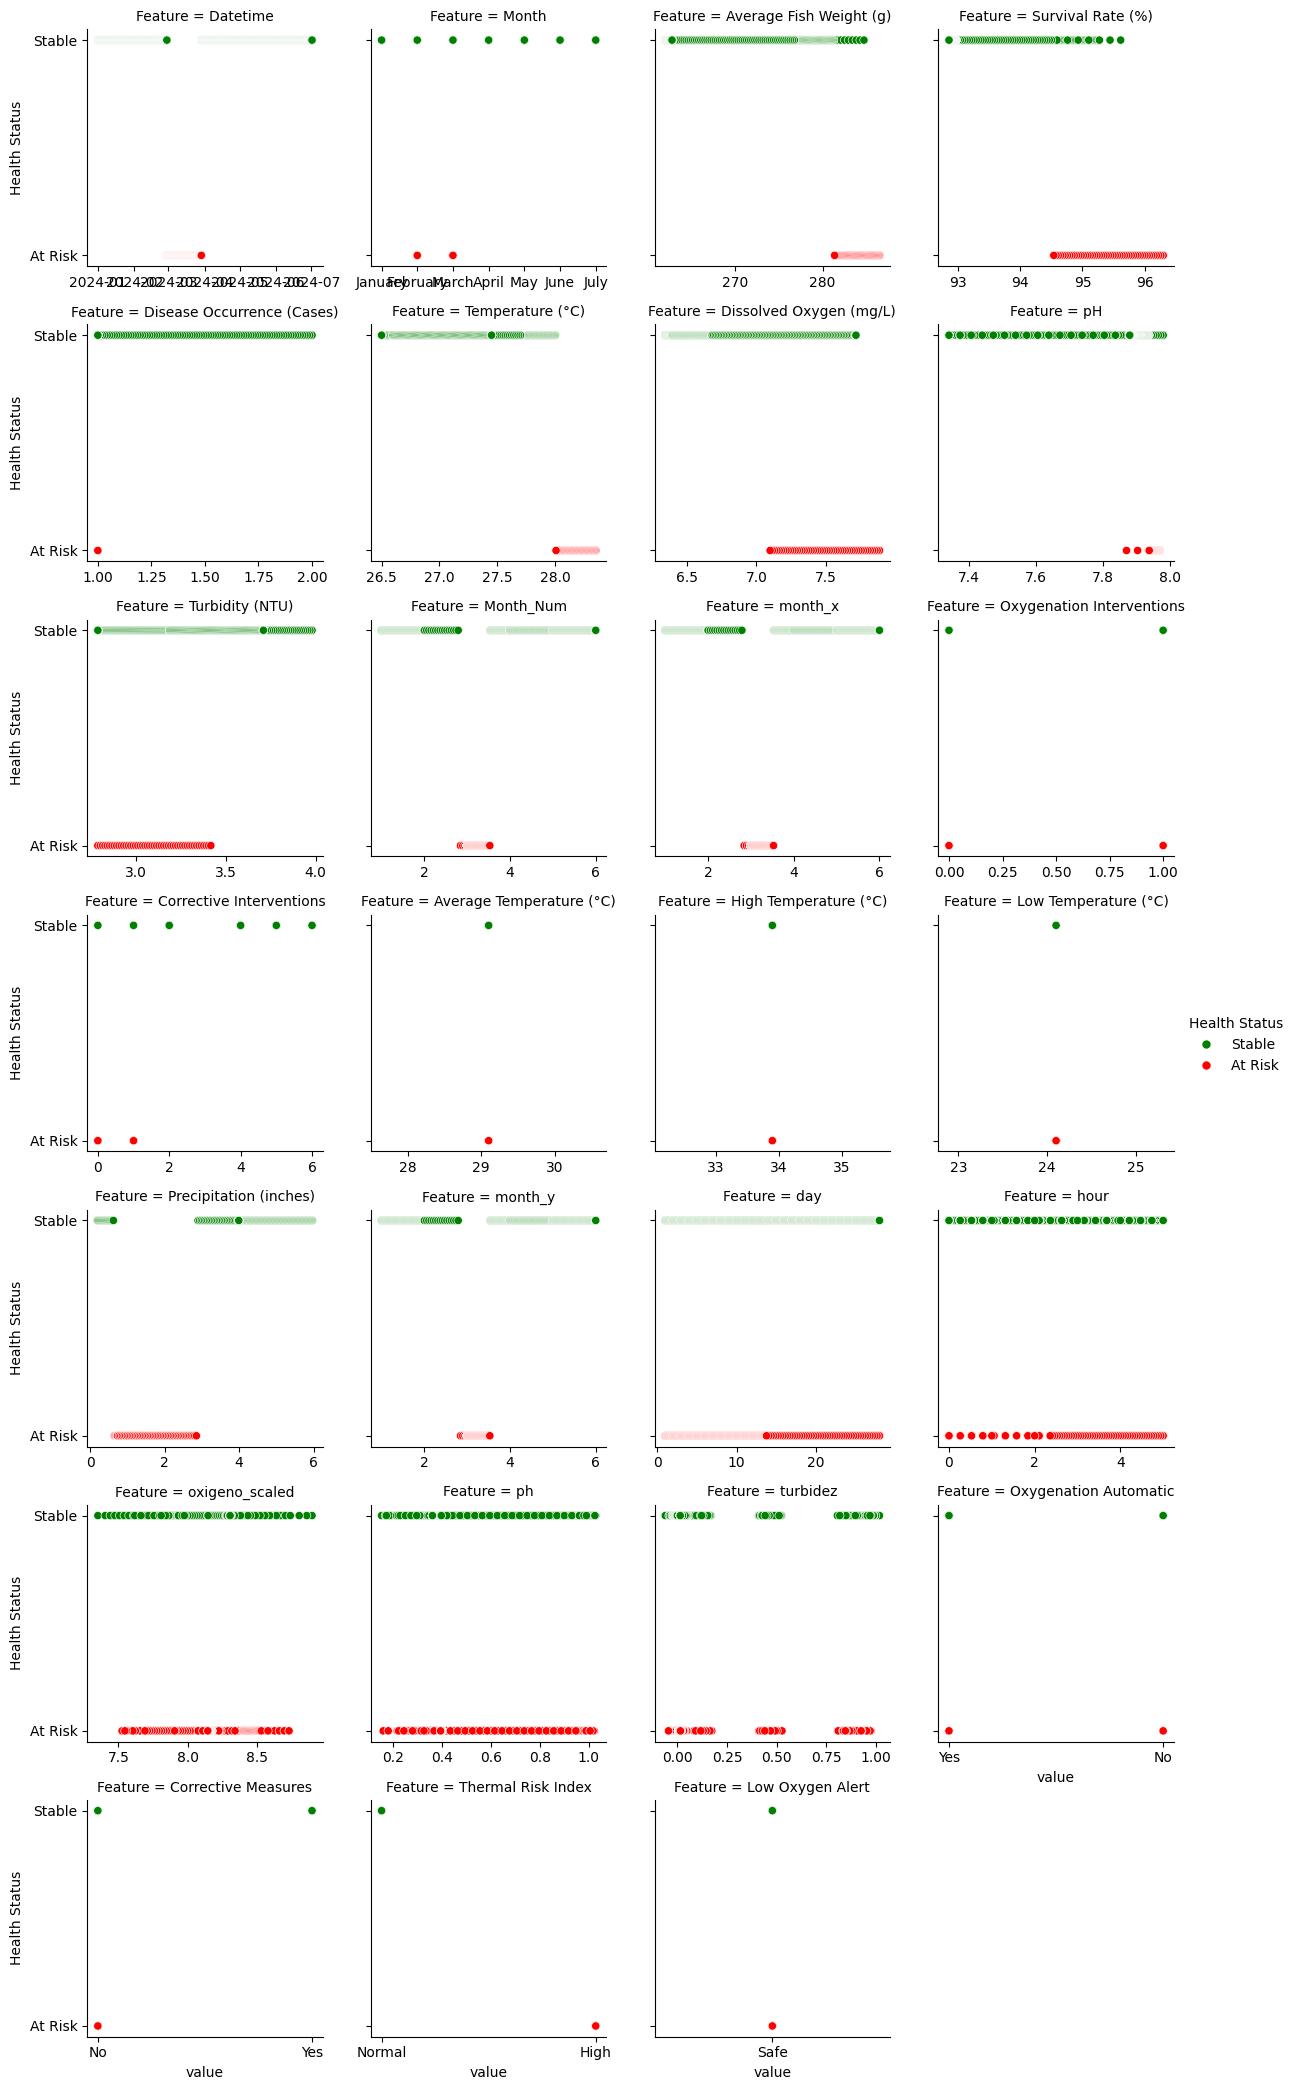

In [6]:
# plot the correlation between the features and the target variable
# Select feature columns (excluding 'Health Status')
feature_columns = [col for col in quality_df.columns if col != 'Health Status']

dfm = quality_df.melt(id_vars='Health Status', value_vars=feature_columns, var_name='Feature')

# Create a scatter plot with color based on 'Health Status'
# Define the color palette for numeric values (0 = At Risk, 1 = Stable)
#palette = {0: 'red', 1: 'green'}
palette={'Stable': 'green', 'At Risk': 'red'}
p = sns.relplot(kind='scatter', data=dfm, x='value', y='Health Status', hue='Health Status', 
                palette=palette, height=3,
                col='Feature', col_wrap=4, facet_kws={'sharex': False})

In [7]:
# Check for features that are not numerical

categorical = [var for var in quality_df.columns if quality_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Month', 'Oxygenation Automatic', 'Corrective Measures', 'Thermal Risk Index', 'Low Oxygen Alert', 'Health Status']


In [8]:
# Check the format of the categorical variables
quality_df[categorical].head()


,Month,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,January,Yes,No,Normal,Safe,Stable
1,January,No,No,Normal,Safe,Stable
2,January,Yes,No,Normal,Safe,Stable
3,January,No,No,Normal,Safe,Stable
4,January,Yes,No,Normal,Safe,Stable


#### Summary of the categorical variables

**Month:**  (January - December) We will be dropping this feature  
**Oxygenation Automatic:**  Yes/No  
**Corrective Measures:**  Yes/No  
**Thermal Risk Index:**  Normal/High  
**Low Oxygen Alert:**  	Safe/Alert  
**Health Status:**  Stable/At Risk  

## Task 3: Arranging the Data

##### **Converting Non-numeric values to integer values**

The dataset contains several non-numeric columns that need to be transformed into a numerical format for machine learning models. Below is an explanation of how each column is processed.

1. **Health Status (Target Variable)**: We convert it into a binary classification:
    - Stable → 1 (Healthy)
    - At Risk → 0 (Unhealthy)

2. **Oxygenation Automatic**: This column contains Yes/No values. The new column Oxygenation_Automatic represents:
    - Yes → 1 
    - No → 0 (implicitly dropped)

3. **Corrective Measures**: This column contains Yes/No values. We apply one-hot encoding, keeping only one column The new column Corrective_Measures represents:
    - Yes → 1 
    - No → 0 (implicitly dropped)

4. **Thermal Risk Index**: This column contains categorical values, e.g., Normal, High, Low. We apply one-hot encoding, dropping the first category (Low).The remaining column Thermal_Risk_Index captures:
    - Normal → 1
    - High → 0 (implicitly dropped)

5. **Low Oxygen Alert**:This column contains Safe/Alert values.The new column Low_Oxygen_Alert represents:
    - Safe → 1
    - Alert → 0






In [9]:
# The health status column consists of either a status of "Stable" or "At Risk"
# The Stable category is stored as 1
# The At Risk category is stored as 0

health_status = []
for x in quality_df['Health Status']:
    if x == "Stable":
        health_status.append(1)
    elif x == "At Risk":
        health_status.append(0)
quality_df['Health Status'] = health_status

In [10]:
# Converting the original Oxygenation Automatic column to boolean values
pd.get_dummies(quality_df['Oxygenation Automatic'])

,No,Yes
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
4378,False,True
4379,True,False
4380,False,True
4381,True,False


In [11]:
# Renaming the column and dropping the column named "No"
oxygenation_automatic = pd.get_dummies(quality_df['Oxygenation Automatic'], drop_first=True)
oxygenation_automatic.rename(columns = {"Yes":"Oxygenation_Automatic"},inplace=True)
oxygenation_automatic.head()

,Oxygenation_Automatic
0,True
1,False
2,True
3,False
4,True


In [12]:
# Converting the original Corrective Measures column to boolean values
pd.get_dummies(quality_df['Corrective Measures'])

,No,Yes
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
4378,True,False
4379,True,False
4380,True,False
4381,True,False


In [13]:
# Renaming the column and dropping the column named "No"
corrective_measures = pd.get_dummies(quality_df['Corrective Measures'], drop_first=True)
corrective_measures.rename(columns = {"Yes":"Corrective_Measures"},inplace=True)
corrective_measures.head()

,Corrective_Measures
0,False
1,False
2,False
3,False
4,False


In [14]:
# Converting the original Thermal Risk Index column to boolean values
pd.get_dummies(quality_df['Thermal Risk Index'])

,High,Normal
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
4378,False,True
4379,False,True
4380,False,True
4381,False,True


In [15]:
# Renaming the column and dropping the column named "No"
thermal_risk_index = pd.get_dummies(quality_df['Thermal Risk Index'], drop_first=True)
thermal_risk_index.rename(columns = {"Normal":"Thermal_Risk_Index"},inplace=True)
thermal_risk_index.head()

,Thermal_Risk_Index
0,True
1,True
2,True
3,True
4,True


In [16]:
# Converting the original Low Oxygen Alert column to boolean values
low_oxygen_alert = pd.get_dummies(quality_df['Low Oxygen Alert'])
low_oxygen_alert

,Safe
0,True
1,True
2,True
3,True
4,True
...,...
4378,True
4379,True
4380,True
4381,True


In [17]:
# Renaming the column
low_oxygen_alert.rename(columns = {"Safe":"Low_Oxygen_Alert"},inplace=True)
low_oxygen_alert


,Low_Oxygen_Alert
0,True
1,True
2,True
3,True
4,True
...,...
4378,True
4379,True
4380,True
4381,True


#### **Final Data Preparation**

**Step 1: Data Transformation**
- Merging the encoded columns back into the dataset
- Dropping the original categorical columns to avoid duplication


In [18]:
# Adding the newcolumns to the original dataframe
quality_df = pd.concat([quality_df, oxygenation_automatic, corrective_measures, thermal_risk_index, low_oxygen_alert], axis=1)
# Dropping the original columns
quality_df.drop(['Oxygenation Automatic','Corrective Measures','Thermal Risk Index','Low Oxygen Alert'],axis=1,inplace=True)
# Checking the data
quality_df.head()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Health Status,Oxygenation_Automatic,Corrective_Measures,Thermal_Risk_Index,Low_Oxygen_Alert
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,0.0,8.355273,0.387898,0.020505,1,True,False,True,True
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,1.0,8.256397,0.343950,0.108561,1,False,False,True,True
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,2.0,8.511549,0.365285,0.410457,1,True,False,True,True
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,3.0,8.362301,0.189601,0.891217,1,False,False,True,True
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,4.0,8.003350,0.318775,0.936614,1,True,False,True,True


In [19]:
# Checking the data type of the columns
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    4383 non-null   datetime64[ns]
 1   Month                       4383 non-null   object        
 2   Average Fish Weight (g)     4383 non-null   float64       
 3   Survival Rate (%)           4383 non-null   float64       
 4   Disease Occurrence (Cases)  4383 non-null   float64       
 5   Temperature (°C)            4383 non-null   float64       
 6   Dissolved Oxygen (mg/L)     4383 non-null   float64       
 7   pH                          4383 non-null   float64       
 8   Turbidity (NTU)             4383 non-null   float64       
 9   Month_Num                   4383 non-null   float64       
 10  month_x                     4383 non-null   float64       
 11  Oxygenation Interventions   4383 non-null   int64       

**Step 2: Features and Target Variables Selection**
- We define x features and target variable y


In [20]:
# For the features we consider all the columns except for health status, datetime and month
X = quality_df.drop(['Health Status','Datetime','Month'], axis=1)
# For the target class we use health status
y = quality_df['Health Status']

In [21]:
# Converting the boolean columns to int 
# This step is needed for gradient descent to work
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

In [22]:
# We split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Task 4: Performing Logistic Regression

### Training with Standard Logistic Regression Function

#### **Model Training and Evaluation:**
1. Fit a logistic regression model to the training data.
2. Use the trained model to predict fish health status on the test set.
3. Analayze the models accuracy using a classification report and confusion matrix.
4. Extract the optimized coefficients and intercept.

In [23]:
logmodel = LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Making predictions 
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
# Checking the y test values
y_test

670     1
2417    1
596     1
2629    1
1395    1
       ..
1902    0
1936    0
3986    1
4165    1
948     1
Name: Health Status, Length: 1315, dtype: int64

In [27]:
# Analyzing the classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00      1096

    accuracy                           1.00      1315
   macro avg       1.00      1.00      1.00      1315
weighted avg       1.00      1.00      1.00      1315



In [28]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, predictions)*100

In [29]:
# Looking at the confusion matrix
confusion_matrix(y_test,predictions)

array([[ 219,    0],
       [   1, 1095]])

In [30]:
# Getting the coefficents of the model

coefficients = logmodel.coef_[0]  # Flatten the coefficients array if it's 2D
intercept = logmodel.intercept_  # Intercept (bias term)

# Print intercept
print(f"Intercept (theta_0): {intercept[0]:.6f}")  # Assuming intercept is a 1D array

# Print coefficients
print("\nOptimized coefficients:")
for i, value in enumerate(coefficients):
    print(f"theta_{i+1}: {value:.6f}")  # Start from theta_1 for the coefficients

Intercept (theta_0): 0.112288

Optimized coefficients:
theta_1: -0.466601
theta_2: 0.222292
theta_3: 0.112608
theta_4: -1.046264
theta_5: -1.776544
theta_6: -0.360586
theta_7: 0.563059
theta_8: -0.520707
theta_9: -0.520707
theta_10: 0.395794
theta_11: 0.223128
theta_12: 1.708523
theta_13: 1.990342
theta_14: 1.414963
theta_15: 0.754089
theta_16: -0.520707
theta_17: -0.011056
theta_18: -0.155707
theta_19: 0.537919
theta_20: 0.048497
theta_21: 0.049247
theta_22: 0.078675
theta_23: 0.024168
theta_24: 3.119601
theta_25: 0.058712


**Analyzing the Results:**

Precision: The precision for both classes was 1.00 which indicates that every positive and negative predicition was correct.

Recall: The recall for both classes was 1.00 which indicates that the model correctly identified every instance of each class.

Accuracy: The accuracy was 1.00, which indicates that all predictions were made correctly. 

### Training with Gradient Descent

#### **Gradient Descent Steps**
**1. Define the sigmoid function used for Logistic Regression**  

 The sigmoid function is used to ensure the output is between 0 & 1

 Its equation is: $ h_{\theta}(X) = \sigma(X\theta) = \frac{1}{1 + e^{-X\theta}} $

Where:
-  X is the feature matrix (including a bias term).
- $\theta$ is the parameter vector.

**2. Compute the Gradient**

The gradient of the cost function with respect to $\theta$ is: $ \frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T (h_{\theta}(X) - y) $

This function is used to update $\theta$ to minimize the loss.

**3. Define the Loss Function**

The loss function used in Logistic Regression is: $ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] $

Where:
- m is the number of training examples.
- $\{ y^{(i)} \}$ is the actual label (0 or 1).
- $\{ h_{\theta}(x^{(i)}) \}$ is the predicted probability.

**4. Update the Parameters**

Using Gradient Descent, we update $\theta$: $ \theta = \theta - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta} $

Where:
- $\alpha$ is the learning rate, controlling step size.
- $\{ \frac{\partial J(\theta)}{\partial \theta} \}$ is the gradient computed in step 2.

**5. Repeat Until Convergence**

- Repeat until the change in $\theta$ is smaller than a threshold e.g., $10^{-5}$.
- If  $\alpha$ is too high, the loss might diverge.
- If  $\alpha$ is too low, convergence might be too slow.


In [31]:
# Checking what X looks like
X

,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,month_x,Oxygenation Interventions,...,month_y,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation_Automatic,Corrective_Measures,Thermal_Risk_Index,Low_Oxygen_Alert
0,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,0.0,8.355273,0.387898,0.020505,1,0,1,1
1,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,1.0,8.256397,0.343950,0.108561,0,0,1,1
2,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,1,...,1.0,1.0,2.0,8.511549,0.365285,0.410457,1,0,1,1
3,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,3.0,8.362301,0.189601,0.891217,0,0,1,1
4,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,4.0,8.003350,0.318775,0.936614,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,1,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,1,0,1,1
4379,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,1,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,0,0,1,1
4380,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,0,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,1,0,1,1
4381,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,0,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,0,0,1,1


In [32]:
# Checking the target column and ensure its all integers
y

0       1
1       1
2       1
3       1
4       1
       ..
4378    1
4379    1
4380    1
4381    1
4382    1
Name: Health Status, Length: 4383, dtype: int64

In [33]:
# Scaling the data to ensure they are on the same scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
# Add bias term (intercept)
X = np.c_[np.ones((X.shape[0],1)), X] 
X.shape

(4383, 26)

In [35]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
# Defining the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [37]:
# Defining log likelihood (not used)
def log_likelihood(X, y, theta):
    """Compute the log-likelihood function."""
    linear_model = np.dot(X, theta)  # X * theta
    return np.sum(y * linear_model - np.log1p(1 + np.exp(linear_model)))

In [38]:
# Computing the gradient
def gradient(X, y, theta):
    """Compute the gradient of the log-likelihood function."""
    m = len(X)
    predictions = sigmoid(np.dot(X, theta))
    grad = (np.dot(X.T, (predictions - y)))  # (yi - pi) * xi
    grad_new = 1/m * grad
    return grad_new


In [39]:
# Updating theta
def gradient_descent(X, y, theta, learning_rate=0.001, epochs=50000):
    loss_history = []
    """Perform gradient descent to optimize theta."""
    for i in range(epochs):
        theta_old = theta
        theta = theta - (learning_rate * gradient(X, y, theta))
        loss =  -np.mean(y * np.log(sigmoid(np.dot(X, theta))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, theta))))
        loss_history.append(loss)
        if np.linalg.norm(theta - theta_old) < 1e-5:
            print(f"Iteration {i}...Breaking")
            break
    return theta, loss_history

In [40]:
def predict(X, theta):
    """Predict binary labels using the trained logistic regression model."""
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

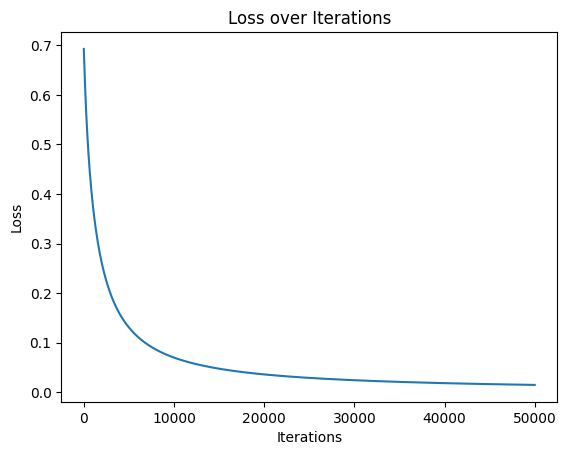

In [41]:
theta1 = np.zeros(X_train1.shape[1])
theta1, loss_history = gradient_descent(X_train1, y_train1, theta1, learning_rate=0.001, epochs=50000)


plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()


In [42]:
# Extract intercept (first value)
intercept = theta1[0]

# Extract remaining parameters
remaining_params = theta1[1:]

# Print output nicely
print(f"Intercept: {intercept:.6f}")
print("Optimized theta (other coefficients):")
for i, value in enumerate(remaining_params, 1):
    print(f"theta_{i}: {value:.6f}")

Intercept: 2.468710
Optimized theta (other coefficients):
theta_1: -0.664544
theta_2: -0.790070
theta_3: 0.608316
theta_4: -0.633045
theta_5: -0.723326
theta_6: -0.339410
theta_7: 0.752830
theta_8: -0.053892
theta_9: -0.053892
theta_10: 0.028537
theta_11: 0.117081
theta_12: 0.000000
theta_13: 0.000000
theta_14: 0.000000
theta_15: 0.081517
theta_16: -0.053892
theta_17: -0.009675
theta_18: -0.025872
theta_19: 0.074376
theta_20: -0.033906
theta_21: 0.001160
theta_22: -0.007046
theta_23: 0.019055
theta_24: 1.407163
theta_25: 0.000000


In [43]:
# Predictions
predictions = predict(X_test1, theta1)
accuracy2 = np.mean(predictions == y_test1)*100
print(f"Accuracy of gradient decent is: {accuracy2:.2f}%")

Accuracy of gradient decent is: 99.85%


### Using the Newton-Raphson Method


#### **Newton-Raphson Algorithm**
**1.  Initialize the parameter estimate $\theta$ to some starting value.**

**2. Repeat until convergence or a maximum number of iterations is reached:**

   - 1. Compute the Newton step using the current parameter estimate.
   - 2. Update the parameter estimate $\theta$ with the Newton step.
   - 3. Check for convergence based on a convergence criterion.
   - 4. If convergence is not reached, continue to step 2.
   - 5. Return the updated parameter estimate $\theta$.
   - 6. Plot the loss over iterations.




In [44]:
X.shape

(4383, 26)

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.3,random_state=42)


#### **Newton-Step**  

This function computes one iteration of Newton’s method in the following steps:
1.  Computes $p = \sigma(X\theta)$, where $X$ is the feature matrix and $\theta$ is the current parameter estimate.  

2. Compute the diagonal weight matrix $W$  the Hessian weight matrix, where $ W_{ii} = p_i(1 - p_i) $.  

3. Compute the Hessian matrix $H = X^TWX$. 

4. Compute the gradient 
    $g = -X^TW(y - p)$.

5. Compute the Newton Step (without regularization)
    $\theta^{(t+1)} = \theta^{(t)} + H^{-1}g$  
    If regularization is used, add the regularization term to the Newton step.  
    $\theta^{(t+1)} = \theta^{(t)} + (H + \lambda I)^{-1}g$






In [46]:

def newton_step(curr_theta, y, X, reg=None):
    """
    Compute one Newton's step for logistic regression."
    curr_theta : 
        A 2D array of shape (N, 1), representing the current model parameters (theta).
    y : 
        A 2D array of shape (N, 1), representing the true labels (target values).
    X : 
        A 2D array of shape (N, M), representing the input features matrix (X), where N is the number of samples and M is the number of features.
    reg : float, optional (default=None)
        The regularization term. It adds regularization to the Hessian matrix to avoid overfitting.
    """
    # Step 1: Compute predicted probabilities using the sigmoid function
    p = np.array(sigmoid(X.dot(curr_theta[:,0])), ndmin=2).T  # probability matrix - N x 1

    # Step 2: Compute the diagonal weight matrix W
    W = np.diag((p*(1-p))[:,0]) # diagonal matrix with p*(1-p) on the diagonal

    # Step 3: Compute the Hessian matrix (second derivative of the log-likelihood)
    hessian = X.T.dot(W).dot(X)  # 26 by 26 matrix

    # Step 4: Compute the gradient (first derivative of the log-likelihood)
    grad = X.T.dot(y-p)  # 26 by 1 matrix
    
    # Regularization step, needed, without it we get Singular Matrix Error. 
    if reg:
        step = np.dot(np.linalg.inv(hessian + reg*np.eye(curr_theta.shape[0])), grad)
    else:
        step = np.dot(np.linalg.inv(hessian), grad)

    #update model parameters    
    theta = curr_theta + step
    
    return theta

In [47]:

def check_convergence(theta_old, theta_new, tol, iters):
    coef_change = np.abs(theta_old - theta_new)
    return not (np.any(coef_change>tol) and iters < max_iters)

In [48]:
def test_model(X, y, theta):
    prob = np.array(sigmoid(X.dot(theta)))
    
    ## Converting prob to prediction, >.5 = True, <.5 = False
    prob = np.greater(prob, 0.5*np.ones((prob.shape[1],1)))
    accuracy = np.count_nonzero(np.equal(prob, y))/prob.shape[0] * 100
    return accuracy

Converged after 15 Iterations


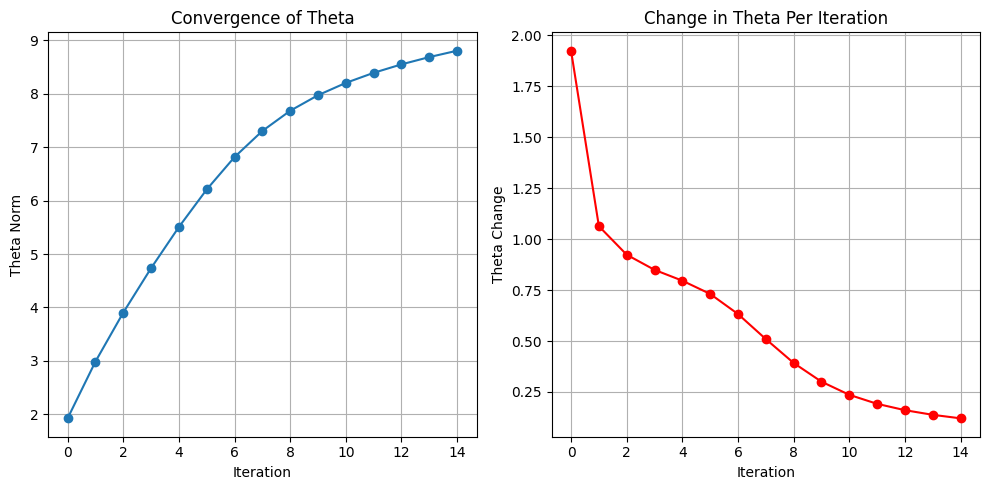

In [49]:
## Hyperparameters
max_iters = 20
tol=0.1 # convergence tolerance
reg_term = 1

theta2_old, theta2 = np.ones((X_train2.shape[1],1)), np.zeros((X_train2.shape[1],1))
iter_count = 0
coefs_converged = False

theta_history = []  # Store theta values for plotting
theta_diff_history = []  # Store theta change per iteration



while not coefs_converged:
    #print('Iteration: {}'.format(iter_count))
    # print('Validation Accuracy: {}%'.format(
    #     test_model(X_val, y_val.to_frame(), theta2_old)))
    theta2_old = theta2
    theta2 = newton_step(theta2, y_train2.to_frame(), X_train2, reg_term)
    theta_history.append(np.linalg.norm(theta2))  # Store norm of theta
    theta_diff_history.append(np.linalg.norm(theta2 - theta2_old))  # Store norm of theta change

    iter_count += 1
    coefs_converged = check_convergence(theta2_old, theta2, tol, iter_count)

print('Converged after {} Iterations'.format(iter_count))

# Plot convergence graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(theta_history)), theta_history, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Theta Norm')
plt.title('Convergence of Theta')
plt.grid()

# Plot theta change per iteration
plt.subplot(1, 2, 2)
plt.plot(range(len(theta_diff_history)), theta_diff_history, marker='o', linestyle='-', color='r')
plt.xlabel('Iteration')
plt.ylabel('Theta Change')
plt.title('Change in Theta Per Iteration')
plt.grid()

plt.tight_layout()
plt.show()


**Convergence of $\theta$ Graph** 
The theta norm $|\theta|_2$ refers to the magnitude of the parameter vector $\theta $ in the logistic regression model.  
At the start, theta is updated significantly, so its norm grows as the model starts learning, but as the optimization moves closer to the optimal parameters, step sizes decrease and eventually, the updates become very small, leading to a nearly flat curve—indicating convergence.  
      
**Change in $\theta$ Per Iteration**
This graph shows the change in the the parameter vector $\theta$ per iteration. As the model learns, the change is initially large, indicating rapid learning, but as the iterations incraes, the changes become smaller indicating the model is settling near the optimal values. 

In [50]:
# Test the model
accuracy3 = test_model(X_test2, y_test2.to_frame(), theta2)
print('Test Accuracy: {}%'.format(
        accuracy3))

Test Accuracy: 100.0%


In [51]:
# Extract intercept (first value)
intercept = float(theta2[0])

# Extract remaining parameters
remaining_params = theta2[1:].flatten()

# Print output nicely
print(f"Intercept: {intercept:.6f}")
print("Optimized theta (other coefficients):")
for i, value in enumerate(remaining_params, 1):
    print(f"theta_{i}: {float(value):.6f}")

Intercept: 6.808716
Optimized theta (other coefficients):
theta_1: -0.785351
theta_2: -0.963025
theta_3: 0.771264
theta_4: -0.660896
theta_5: -0.682396
theta_6: -0.515820
theta_7: 0.984619
theta_8: -0.054644
theta_9: -0.054644
theta_10: 0.120025
theta_11: 0.077692
theta_12: 0.000000
theta_13: 0.000000
theta_14: 0.000000
theta_15: -0.103161
theta_16: -0.054644
theta_17: -0.050953
theta_18: -0.066087
theta_19: 0.084288
theta_20: -0.056749
theta_21: -0.020623
theta_22: 0.010345
theta_23: 0.006777
theta_24: 5.186357
theta_25: 0.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_9200\2504295029.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(theta2[0])


### **Comparing the Models**

In [56]:
# Getting the coefficients for model 1
coefficients_model1 = logmodel.coef_[0]  # Flatten the coefficients array if it's 2D
intercept_model1 = logmodel.intercept_

# Coefficients for model 2
intercept_model2 = theta1[0]
remaining_params_model2 = theta1[1:]

# Coefficients for model 3
intercept_model3 = float(theta2[0])
remaining_params_model3 = theta2[1:].flatten()

# Creating a dictionary to hold the coefficients in rows for each theta
coefficients_dict = {
    "Coefficients": ["Intercept (theta_0)"] + [f"theta_{i+1}" for i in range(len(coefficients_model1))],
    "Logistic Regression": [intercept_model1] + list(coefficients_model1),
    "Gradient Decent": [intercept_model2] + list(remaining_params_model2),
    "Newton Method": [intercept_model3] + list(remaining_params_model3)
}

# Creating a dataframe
coefficients_df = pd.DataFrame(coefficients_dict)
# Rounding the values to 6 decimal places
coefficients_df = coefficients_df.applymap(lambda x: f"{x:.6f}" if isinstance(x, (int, float)) else x)
# Printing the dataframe
coefficients_df


C:\Users\hp\AppData\Local\Temp\ipykernel_9200\939937029.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept_model3 = float(theta2[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_9200\939937029.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coefficients_df = coefficients_df.applymap(lambda x: f"{x:.6f}" if isinstance(x, (int, float)) else x)


,Coefficients,Logistic Regression,Gradient Decent,Newton Method
0,Intercept (theta_0),[0.11228751887653439],2.468710,6.808716
1,theta_1,-0.466601,-0.664544,-0.785351
2,theta_2,0.222292,-0.790070,-0.963025
3,theta_3,0.112608,0.608316,0.771264
4,theta_4,-1.046264,-0.633045,-0.660896
5,theta_5,-1.776544,-0.723326,-0.682396
6,theta_6,-0.360586,-0.339410,-0.515820
7,theta_7,0.563059,0.752830,0.984619
8,theta_8,-0.520707,-0.053892,-0.054644
9,theta_9,-0.520707,-0.053892,-0.054644


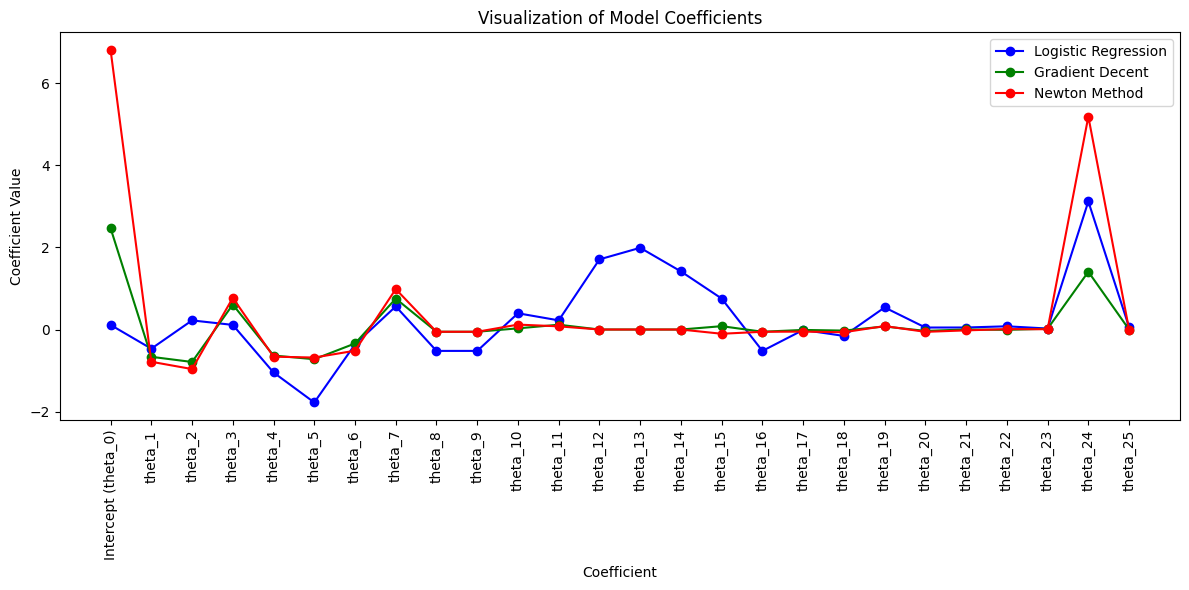

In [53]:
# Converting coefficient values back to float for plotting (except for the labels)
coefficients_df_float = coefficients_df.copy()
for column in coefficients_df.columns[1:]:  # Skip the first column which contains the labels
    coefficients_df_float[column] = coefficients_df_float[column].astype(float)

# Plotting
plt.figure(figsize=(12, 6))

# Plot each model's coefficients with a different color and marker
plt.plot(coefficients_df["Coefficients"], coefficients_df_float["Logistic Regression"], marker='o', label='Logistic Regression', color='b')
plt.plot(coefficients_df["Coefficients"], coefficients_df_float["Gradient Decent"], marker='o', label='Gradient Decent', color='g')
plt.plot(coefficients_df["Coefficients"], coefficients_df_float["Newton Method"], marker='o', label='Newton Method', color='r')

# Adding labels and title
plt.xlabel('Coefficient')
plt.ylabel('Coefficient Value')
plt.title('Visualization of Model Coefficients')
plt.legend()

# Rotating x-axis labels for readability
plt.xticks(rotation=90)

# Adjust layout for better display
plt.tight_layout()
plt.show()

In [ ]:
accuracy_dict = {
    "Method": ["Logistic Regression", "Gradient Descent", "Newton Method"],
    "Accuracy": [accuracy1, accuracy2, accuracy3]  
}

# Creating a DataFrame
accuracy_df = pd.DataFrame(accuracy_dict)

# Rounding accuracy values to 4 decimal places
accuracy_df["Accuracy"] = accuracy_df["Accuracy"].round(4)

# Printing the DataFrame
accuracy_df

,Method,Accuracy
0,Logistic Regression,99.9240
1,Gradient Descent,99.8479
2,Newton Method,100.0000


#### **Analyzing & Comparing the Results**

1. Accuracy Differences:

The Newton’s Method achieved the highest accuracy (100%) while the standard Logistic Regression followed closely with 99.92% and Gradient Descent had a slightly lower accuracy (99.84%), which could be due to learning rate selection.

2. Coefficient Variations:

Most coefficients are relatively similar across all three methods, but some differences exist due to the optimization technique used. 

Newton’s Method  produced slightly more extreme coefficient values  while Gradient Descent resulted in some coefficients being closer to zero, which could suggest it didn’t fully converge within the given iterations.